<a href="https://www.kaggle.com/code/danieldeoliveira00/vincent-eduardo-daniel-proyecto-c-emergente?scriptVersionId=278109797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# Esenciales
# !pip install --upgrade scikit-learn imbalanced-learn
import pandas as pd                                            # Procesar datos
import numpy as np                                             # Procesar datos
import seaborn as sns                                          # Mapa de calor
import matplotlib.pyplot as plt                                # Gráficas
import missingno as msno                                       # Gráficas
import tensorflow as tf

# 1. Preprocesamiento de datos
from sklearn.pipeline import Pipeline                          # (1) Pipeline para preprocesar los datos
from imblearn.over_sampling import SMOTE                       # (1) Balanceo SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler # (1) Normalización y estandarización de datos
from sklearn.impute import KNNImputer                          # (1) Manejo de valores nulos
from collections import Counter                                # (1) Librería para contar datos

# 2. Análisis de importanica de características
from sklearn.ensemble import RandomForestClassifier            # (2) Random Forest para análisis de importancia

# 3. Red neuronal multicapa (MLP)
from sklearn.neural_network import MLPClassifier               # (3) Red Neuronal Multicapa (MLP)
from sklearn.model_selection import GridSearchCV               # (3) Elegir la mejor combinación de hiperparámetros
# TensorFlow para la creacion de la Red Neuronal
from tensorflow.keras.models import Sequential                 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Nadam

# 4. Datos de entrenamiento/prueba del modelo
from sklearn.model_selection import train_test_split           # (4) Entrenamiento/test de datos

# 5. Cálculo de métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [4]:
# ==========================================================================
# INFO: Mostrar datos y metadatos del dataset
# ==========================================================================

df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 3276, Columnas: 10


In [5]:
# ==========================================================================
# INFO: Información técnica del dataset (se describe mejor con las gráficas)
# ==========================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


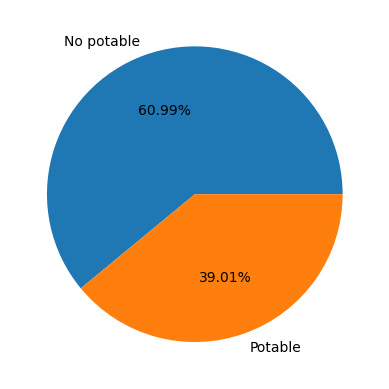

In [6]:
# ==========================================================================
# INFO: Visualizar proporcionar potable/no potable de los datos del dataset
# ==========================================================================

# Tamaño total de la muestra
tamaño_muestra = df["Potability"].count()

# Total de valores no potables (Potability = 0)
num_no_potable = df["Potability"].value_counts()[0]

# Total de valores no potables (Potability = 1)
num_potable = df["Potability"].value_counts()[1]

fig, ax = plt.subplots()
plt.pie([num_no_potable, num_potable], labels=["No potable", "Potable"], autopct='%.2f%%')
plt.show()

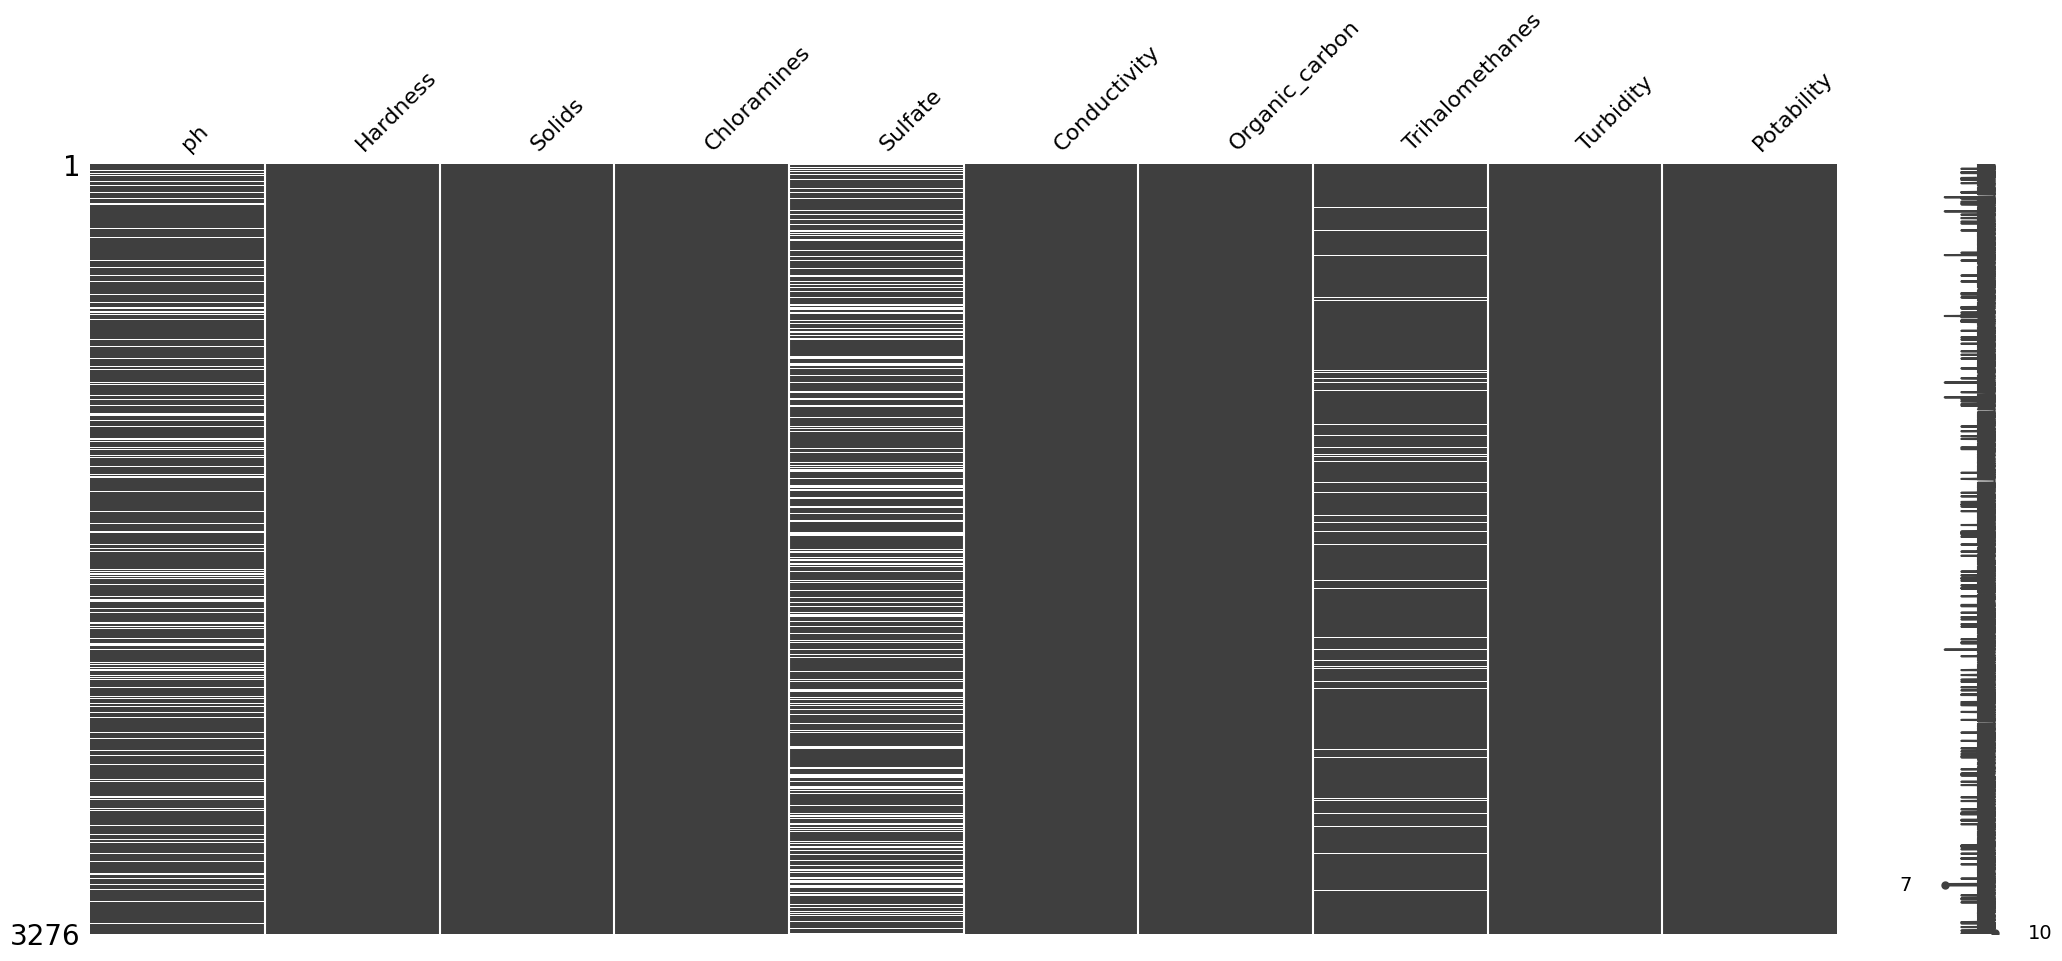

In [7]:
# ==========================================================================
# INFO: Visualizar datos faltantes del dataset. Las líneas blancas son las 
#       celdas donde escazan los valores
# ==========================================================================

msno.matrix(df)
plt.show()

In [8]:
# ==========================================================================
# INFO: Estadísticas de las columnas
# ==========================================================================

# Las columnas representan las variables del dataset
# Las filas representan las estadísticas de cada variable:
#    - mean (promedio)
#    - std (dispersión)
#    - min (mínimo valor)
#    - 25% 50% 75% (percentiles)
#    - max (máximo valor)

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


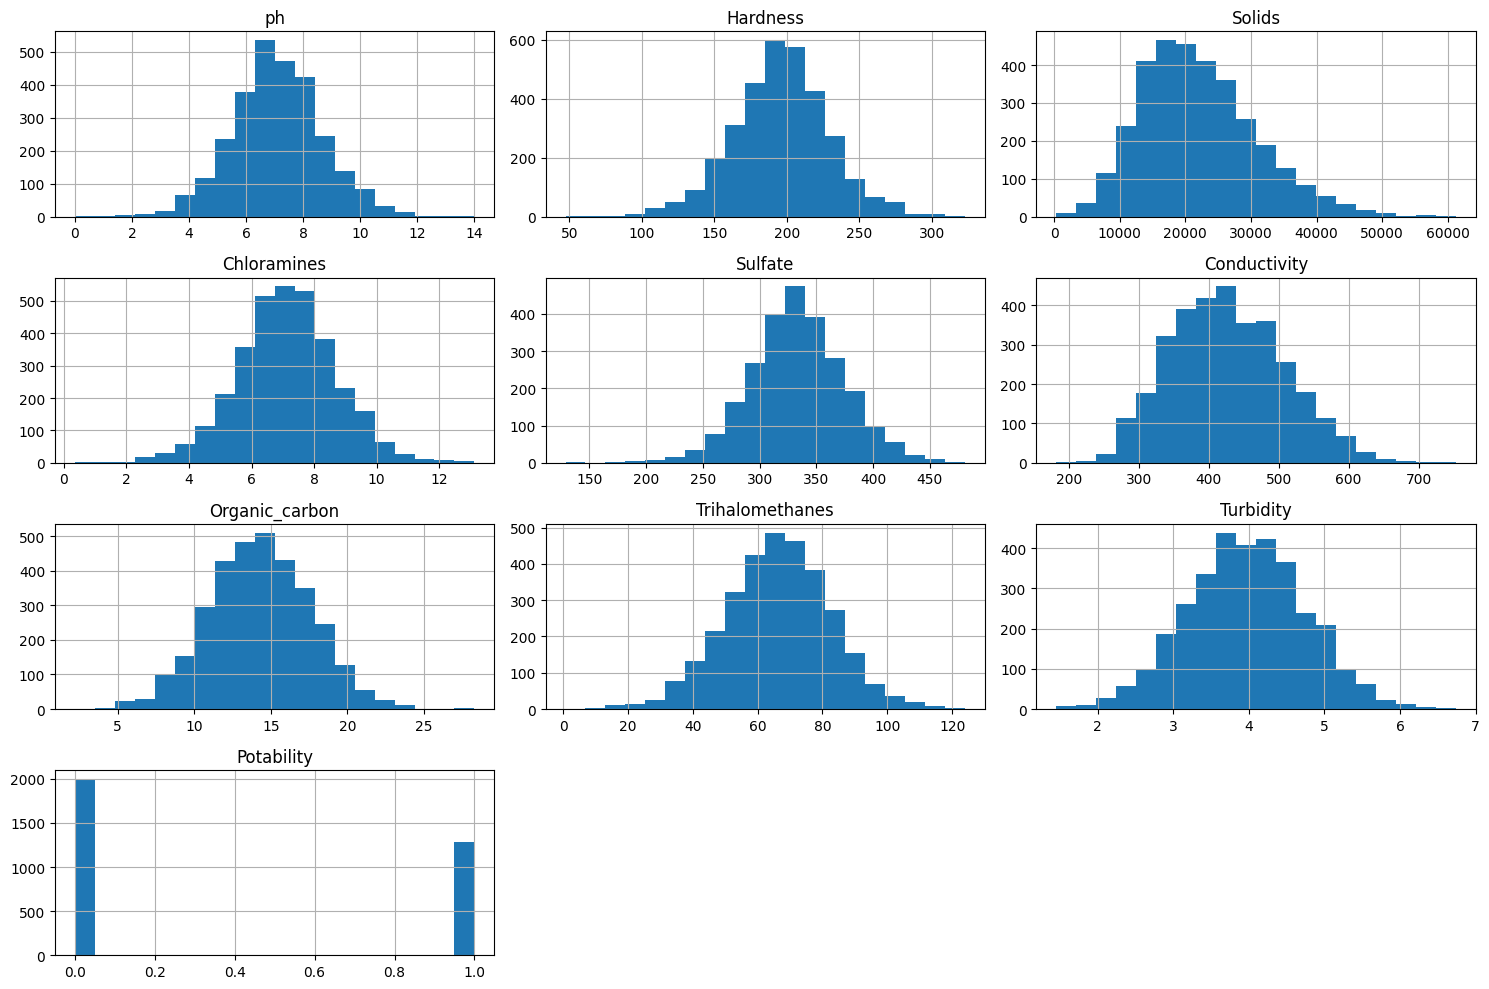

In [9]:
# ==========================================================================
# INFO: Historigramas para ver la distribución de los valores del dataset
# ==========================================================================

df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [10]:
# ==========================================================================
# 1. Preprocesamiento de datos: DIVIDIR VALORES X, y
# ==========================================================================

X = df.drop("Potability", axis=1)
y = df["Potability"]

In [11]:
# ==========================================================================
# 1. Preprocesamiento de datos: DIVISIÓN DE DATOS DE ENTRENAMIENTO/TEST
# ==========================================================================

# Tamaño de datos de prueba (porcentajes)
test_size= 0.30

# Semilla para el generador aleatorio
random_state = 42

# Recordar que X es el conjunto SIN DIVIDIR de los datos; "y" es el conjunto SIN DIVIDIR de los resultados
# Dividir en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state, stratify=y)

print(f"Conjunto de datos de prueba en su totalidad: {len(X_train) + len(y_test)} filas")
print(f"Se ha dividido correctamente el {100-test_size*100}% para datos de ENTRENAMIENTO y {test_size*100}% para PRUEBA")

print(f"Training: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")
print(f"Distribucion training: {Counter(y_train)}")
print(f"Distribucion test: {Counter(y_test)}")

columnas = X.columns
indice_train = X_train.index
indice_test = X_test.index

Conjunto de datos de prueba en su totalidad: 3276 filas
Se ha dividido correctamente el 70.0% para datos de ENTRENAMIENTO y 30.0% para PRUEBA
Training: 2293 muestras
Test: 983 muestras
Distribucion training: Counter({0: 1398, 1: 895})
Distribucion test: Counter({0: 600, 1: 383})


In [12]:
# ==========================================================================
# 1. Preprocesamiento de datos: MANEJO DE VALORES NULOS
# ==========================================================================

# Más pequeño = más sensible al ruido | Más grande = Tiende a suavizar demasiado los datos
imputer = KNNImputer(n_neighbors=30)

# Utilizar el KNNImputer en el X. En el "y" no se utiliza porque no hay ninguna celda nula
X_train_imputed = imputer.fit_transform(X_train)

# Convertir Numpy a Pandas
X_train = pd.DataFrame(X_train_imputed, columns=columnas, index=indice_train)

#Para test
X_test_imputed = imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed,columns=columnas,index=indice_test)

In [13]:
# ==========================================================================
# 1. Preprocesamiento de datos: FUNCIÓN SMOTE
# ==========================================================================

# Antes de ejecutar SMOTE
print(f"Antes de ejecutar la función SMOTE {Counter(y_train)}")

# Agrega datos sintéticos en proporción
sampling_strategy = 0.75

# Semilla para el generador aleatorio
random_state = 42

# Número de vecinos cercanos para crear el dato sintético
k_neighbors = 10

# Instanciar SMOTE: Balancear datasets desequilibrados creando datos SINTÉTICOS en la muestra que tiene menos datos
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state, k_neighbors=k_neighbors)

# Reemplazo de X_train, y_train
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Después de ejecutar SMOTE
print(f"Después de ejecutar SMOTE en el training: {Counter(y_train_balanced)}")

Antes de ejecutar la función SMOTE Counter({0: 1398, 1: 895})
Después de ejecutar SMOTE en el training: Counter({0: 1398, 1: 1048})


In [14]:
# ==========================================================================
# 1. Preprocesamiento de datos: NORMALIZACIÓN DE DATOS
# ==========================================================================

# Seleccionamos los valores a normalizar
features = ['ph','Hardness','Solids','Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Instanciamos el normalizador
scaler = StandardScaler()

# Se realiza la normalizacion
X_train_scaled=scaler.fit_transform(X_train_balanced)
X_test_scaled=scaler.transform(X_test)


# Imprimimos estadísticas
print(f"X entrenamiento escalado: {X_train_scaled.shape}")
print(f"X prueba escalado: {X_test_scaled.shape}")

X entrenamiento escalado: (2446, 9)
X prueba escalado: (983, 9)



DISTRIBUCION FINAL
Entrenamiento balanceado: Counter({0: 1398, 1: 1048})
Prueba original: Counter({0: 600, 1: 383})


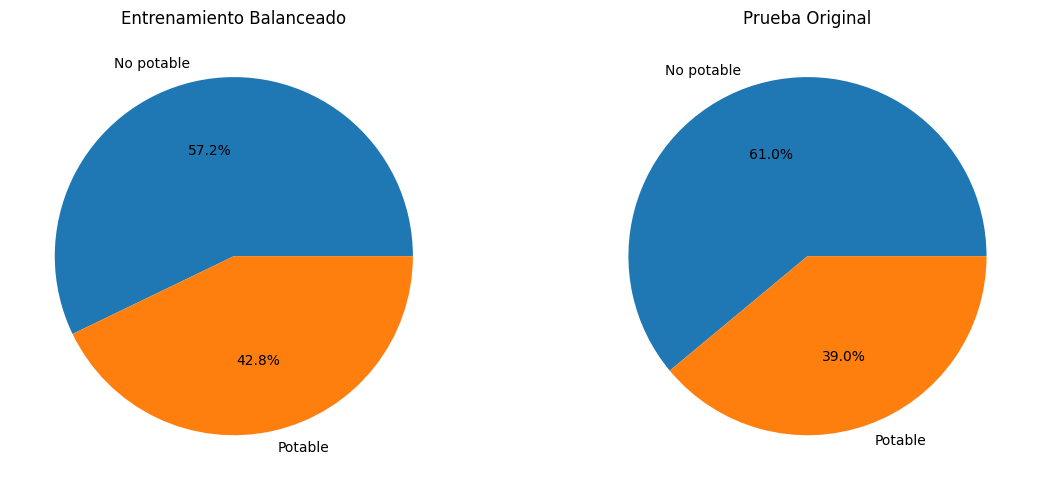

In [15]:
# ==========================================================================
# INFO: Visualizar proporcionar de datos X_train/y_train
# ==========================================================================

print("\nDISTRIBUCION FINAL")
print(f"Entrenamiento balanceado: {Counter(y_train_balanced)}")
print(f"Prueba original: {Counter(y_test)}")

#Para visualizar
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,5))

#Entrenamiento balanceado
ax1.pie([y_train_balanced.value_counts()[0],y_train_balanced.value_counts()[1]],
       labels=["No potable", "Potable"], autopct='%.1f%%')
ax1.set_title('Entrenamiento Balanceado')

#Prueba original
ax2.pie([y_test.value_counts()[0],y_test.value_counts()[1]],
       labels=["No potable", "Potable"], autopct='%.1f%%')
ax2.set_title('Prueba Original')


#Para mostrar las graficas
plt.tight_layout()
plt.show()

In [16]:
# ==========================================================================
# 2. Análisis de importancia de características: MODELO RANDOM FOREST ***ÚNICO***
#    PARA IDENTIFICAR LAS CARACTERÍSTICAS MÁS IMPORTANTES (P1)
# ==========================================================================

# Número de árboles en el bosque. Como es un análisis de importancia, no hace falta generar un arreglo de árboles para identificar cual es el mejor
n_estimators = 300

# Número de procesadores a usar. Recibe -1 para utilizar todos los núcleos disponibles
n_jobs = -1

# Semilla de número aleatorio
random_state = 42

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators = n_estimators, 
    random_state = random_state,
    n_jobs = n_jobs
)

# Entrenar el RF
rf_model.fit(X_train, y_train)

# Log
print(f"El modelo RF ha sido entrenado con {n_estimators} árboles")

El modelo RF ha sido entrenado con 300 árboles


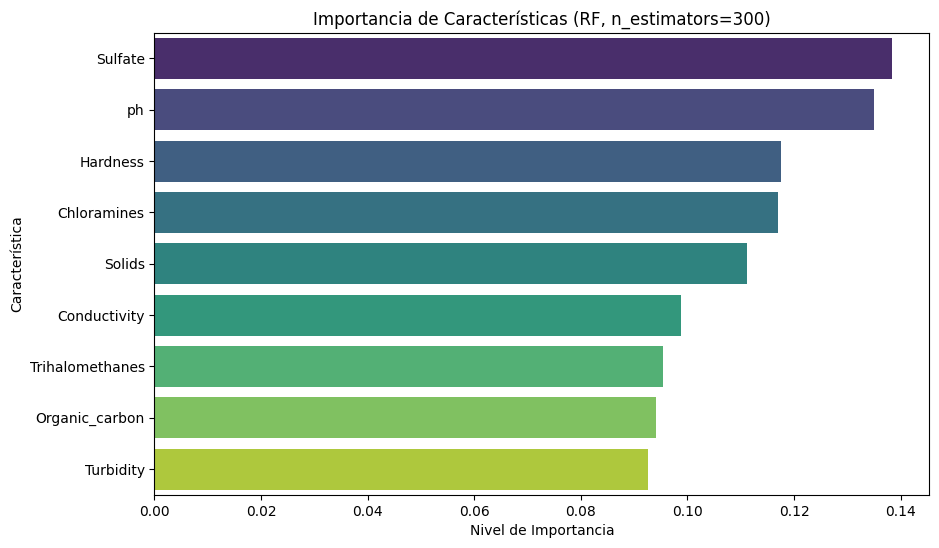

In [17]:
# ==========================================================================
# 2. Análisis de importancia de características: GRAFICAR PROPIEDADES MÁS
#    IMPORTANTES ENCONTRADAS POR EL RANDOM FOREST ***ÚNICO*** (P2)
# ==========================================================================

# Obtener las importancias
importances = rf_model.feature_importances_

# Obtener los nombres de las columnas
feature_names = X.columns

# Crear un DataFrame de Pandas para ver los resultados
importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
})

# Ordenar el DataFrame (de mayor a menor importancia)
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importance_df, palette='viridis')
plt.title(f'Importancia de Características (RF, n_estimators={n_estimators})')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.show()

In [18]:
# ==========================================================================
# 2. Análisis de importancia de características: MODELO RANDOM FOREST ***MEJOR CONFG*** 
#    PARA IDENTIFICAR LAS CARACTERÍSTICAS MÁS IMPORTANTES (P1)
# ==========================================================================

# Número de árboles en el bosque. Como es un análisis de importancia, no hace falta generar un arreglo de árboles para identificar cual es el mejor
n_estimators = np.arange(10,1000,50)
param_grid = {
    'n_estimators': n_estimators
}

# Número de procesadores a usar. Recibe -1 para utilizar todos los núcleos disponibles
n_jobs = -1

# Semilla de número aleatorio
random_state = 42

# Random Forest
rf_base = RandomForestClassifier(
    random_state = random_state,
    n_jobs = n_jobs
)

# Cross-Validation
cv = 5

# Métrica a utilizar para evaluar los modelos
scoring = 'f1_macro'

# Buscar la mejor combinación de hiperparámetros para buscar las características más importantes
grid_search_rf = GridSearchCV(
    estimator=rf_base,                       # Utilizamos el RandomForest
    param_grid=param_grid,                   # Número de árboles a probar
    cv = cv,                                 # Rondas de validación cruzada para medir el rendimiento y evitar la "suerte" de un RF
    scoring = scoring,                       # Métrica a usar para evaluar los modelos
    n_jobs = n_jobs,                         # Cantidad de núcleos a usar
    verbose=2                                # Ver el progreso en pantalla
)

# Entrenar el RF
grid_search_rf.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search_rf.best_estimator_

# Log
print("Búsqueda completada")
print(f"El mejor parámetro (mejor n_estimators) fue: {grid_search_rf.best_params_}")
print(f"El mejor F1-Score durante la búsqueda fue: {grid_search_rf.best_score_:.4f}")
print(f"El mejor modelo ya está guardado en 'best_rf_model'")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Búsqueda completada
El mejor parámetro (mejor n_estimators) fue: {'n_estimators': 510}
El mejor F1-Score durante la búsqueda fue: 0.6175
El mejor modelo ya está guardado en 'best_rf_model'


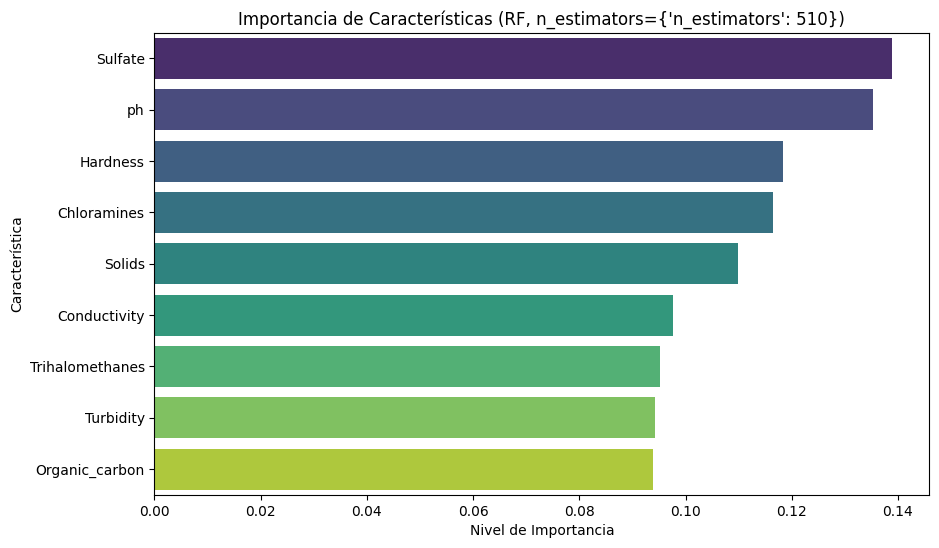

In [19]:
# ==========================================================================
# 2. Análisis de importancia de características: GRAFICAR PROPIEDADES MÁS
#    IMPORTANTES ENCONTRADAS POR EL RANDOM FOREST ***MEJOR CONFG***
# ==========================================================================

# Obtener las importancias
importances = best_rf_model.feature_importances_

# Obtener los nombres de las columnas
feature_names = X.columns

# Crear un DataFrame de Pandas para ver los resultados
importance_df = pd.DataFrame({
   'Característica': feature_names,
   'Importancia': importances
})

# Ordenar el DataFrame (de mayor a menor importancia)
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importance_df, palette='viridis')
plt.title(f'Importancia de Características (RF, n_estimators={grid_search_rf.best_params_})')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.show()

In [20]:
# 3. Red neuronal multicapa (MLP)
input_dim = X_train_scaled.shape[1] # Esto nos trae el numero de caracteriscas del modelo lo cual va a ser nuestras neuronas de entrada en nuestro caso =9
#Asignamos los valores a los parametros de la MLP como learning rate, dropout y l2

learning_rate = 0.0005 
dropout_rate = 0.2
l2_lambda = 0.001

# Nos permite la creacion de  un modelo secuancial facilmente es decir que los datos van de la entrada a las capas ocultas y luego a la salida
modelo = Sequential()

# Al hacer el random forest identificamos que caracteristicas son mas importantes pero nos dimos cuenta de que todos eran bastante 
# parecidos en importancia por lo que decidimos usarlos todos para de esta forma no perder informacion valiosa.
modelo.add(tf.keras.layers.Input(shape=(input_dim,)))
modelo.add(Dense(128,activation='relu',kernel_regularizer=l2(l2_lambda))) # Se tomo una capa densa de 128 neuronas con 9 entradas usando ReLU segun lo planteado en el anteproyecto
# Tambien se uso la regularizacion l2 para obligar a la red neuronal a usar todas las caracteristicas de forma balanceada

modelo.add(BatchNormalization()) # Calcula la media y varianza del batch para lograr un mejor entrenamiento y nos permite usar learning rates mas altos
modelo.add(Dropout(dropout_rate)) # Utilizamos el dropout para apagar neuronas aleatoriamente evitando el overfitting y obligar a aprender caracteristicas redundantes

# Generacion de Capas ocultas practicamente iguales solo que cada una va reduciendo su numero de neuronas para ir captando los patrones 
#desde los mas generales hasta los mas especificos

# Capa oculta 1
modelo.add(Dense(64,activation='relu',kernel_regularizer=l2(l2_lambda)))
modelo.add(BatchNormalization())
modelo.add(Dropout(dropout_rate))

# Capa oculta 2
modelo.add(Dense(32,activation='relu',kernel_regularizer=l2(l2_lambda)))
modelo.add(BatchNormalization())
modelo.add(Dropout(dropout_rate))

# Capa oculta 3
#modelo.add(Dense(32,activation='relu',kernel_regularizer=l2(l2_lambda)))
#modelo.add(BatchNormalization())
#modelo.add(Dropout(dropout_rate))

# Capa de Salida, para esta capa vamos a usar sigmoide ya que queremos que nuestro modelo clasifique binariamente es decir Potable=1 o No Potable=0
modelo.add(Dense(1,activation='sigmoid'))

optimizer = Nadam(learning_rate=learning_rate)
# El optimizer nos ayuda que el modelo sea de rapida convergencia, el binary crossentropy nos dice que tan lejo estan las predicciones de los valores reales
# y luego necesitamos obtener las metricas para saber la efectividad de nuestro modelo para poder ir modificandolo hasta obtener el deseado

# Compilamos el modelo como tal
modelo.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy','precision','recall']
)
# para ver una descripcion de la red creada
modelo.summary()

# Ahorita colocamos los callbacks para hacer el entrenamiento mejor
# Early Stopping para ahorrar tiempo en caso de que no mejore el modelo en la cantidad de epocas colocadas como paciencia.
early_stopping = EarlyStopping(
    monitor='val_auc',          # Monitorea esta metrica
    patience=25,                 # Epocas de espera
    restore_best_weights=True,
    mode='max',
    verbose=1                    
)

# La mas importante es esta ya que nos ayuda a reducir el learning rate para obtener un ajuste mejor
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',          # Monitorea esta metrica
    factor=0.5,                  # Reduce el learning rate en esta cantidad
    patience=8,                  # Epocas de espera
    min_lr=0.00001,               # El numero minimo de learning rate permitido
    cooldown=2,                  # Espera para reduccion de learning rate
    verbose=1                     
)

2025-11-15 02:10:27.091602: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 448 (1.75 KB)

PARAMETROS USADOS
Batch Size: 64
Epocas: 150
Validacion: 0.2
Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5233 - loss: 1.0247 - precision: 0.4130 - recall: 0.5410 - val_accuracy: 0.5082 - val_loss: 0.8366 - val_precision: 0.6519 - val_recall: 0.3986 - learning_rate: 5.0000e-04
Epoch 2/150
16/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5225 - loss: 0.9451 - precision: 0.4093 - recall: 0.5052 

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5164 - loss: 0.9431 - precision: 0.3951 - recall: 0.4880 - val_accuracy: 0.6041 - val_loss: 0.8201 - val_precision: 0.6441 - val_recall: 0.7703 - learning_rate: 5.0000e-04
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5159 - loss: 0.8966 - precision: 0.4161 - recall: 0.4510 - val_accuracy: 0.6061 - val_loss: 0.8115 - val_precision: 0.6435 - val_recall: 0.7804 - learning_rate: 5.0000e-04
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5820 - loss: 0.8592 - precision: 0.4646 - recall: 0.4735 - val_accuracy: 0.6061 - val_loss: 0.8058 - val_precision: 0.6547 - val_recall: 0.7365 - learning_rate: 5.0000e-04
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5791 - loss: 0.8503 - precision: 0.4580 - recall: 0.4687 - val_accuracy: 0.6102 - val_loss: 0.8032 - val_precision: 0.6792 - val_recall: 0.6723 - learning_rate: 5.0000e-04
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0

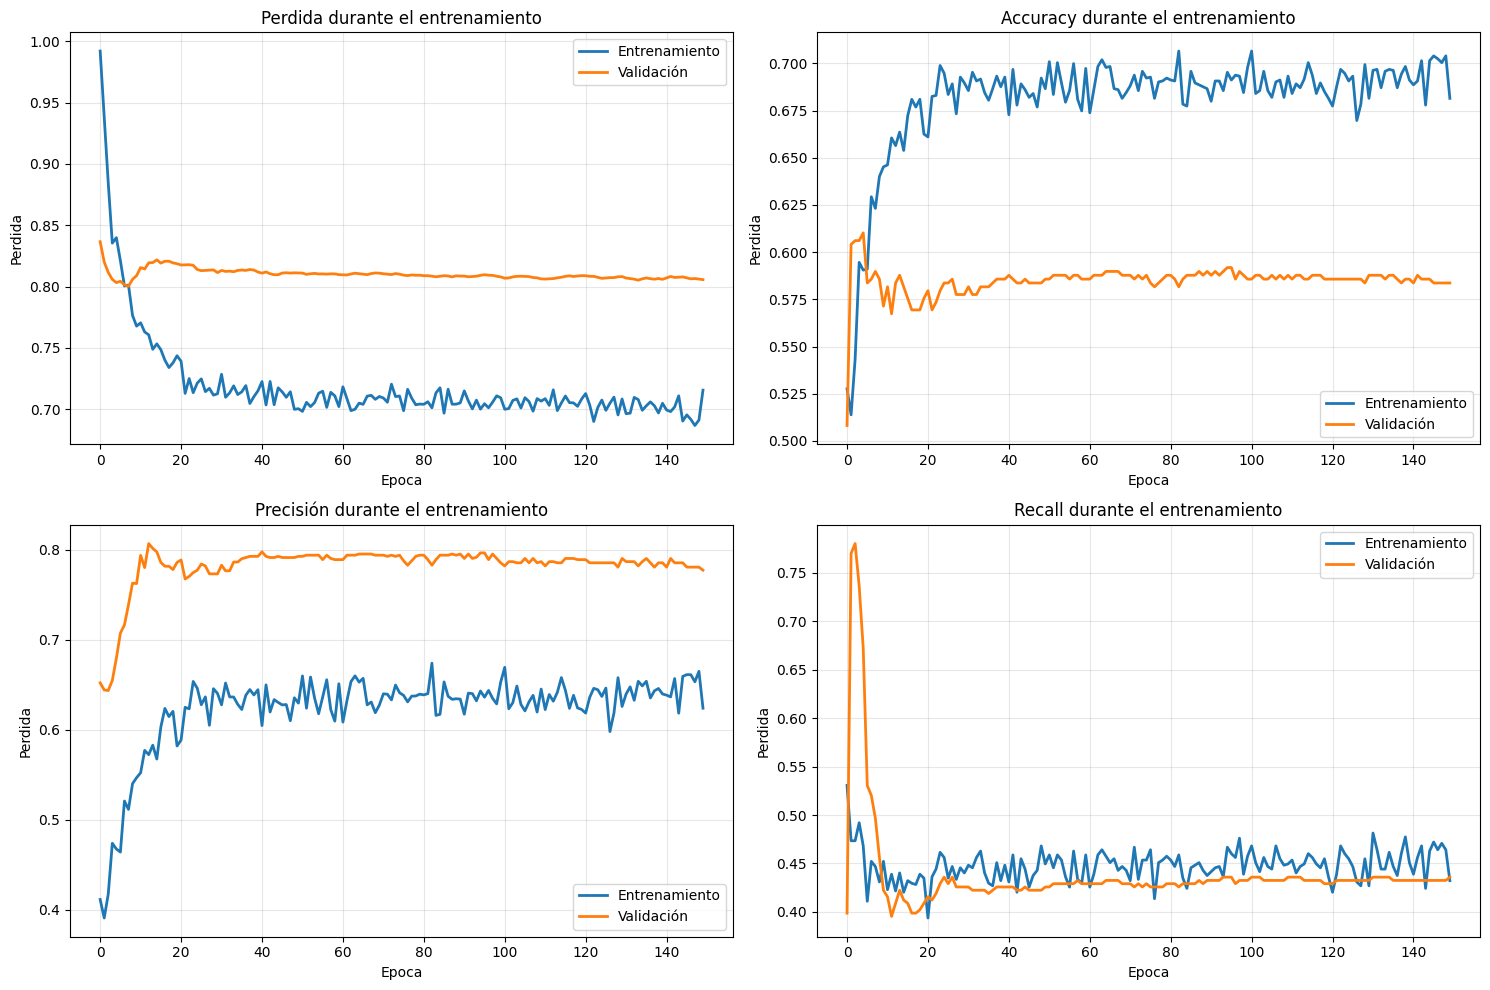

MEJORES METRICAS DE VALIDACION
Epoca: 8
Perdida: 0.8002
Precision: 0.5898


In [21]:
# Entrenamiento del modelo

# Parametros del entrenamiento
batch_size = 64
epocas = 150
validation_split= 0.2

# Log
print("PARAMETROS USADOS")
print(f"Batch Size: {batch_size}")
print(f"Epocas: {epocas}")
print(f"Validacion: {validation_split}")

# Se pasan todos los parametros de la red como sus callbacks, junto con los parametros de entrenamiento.
history = modelo.fit(
    X_train_scaled, 
    y_train_balanced,
    batch_size=batch_size,
    epochs=epocas,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Log
print("Termino el entrenamiento")

# Se grafican los resultados del entrenamiento para ver que tal se comporto la red
fig, axes = plt.subplots(2,2,figsize=(15,10))

# Grafica de perdida
axes[0,0].plot(history.history['loss'],label='Entrenamiento', linewidth=2)
axes[0,0].plot(history.history['val_loss'],label='Validación', linewidth=2)
axes[0,0].set_title('Perdida durante el entrenamiento')
axes[0,0].set_xlabel('Epoca')
axes[0,0].set_ylabel('Perdida')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

#Grafica de accuracy
axes[0,1].plot(history.history['accuracy'],label='Entrenamiento', linewidth=2)
axes[0,1].plot(history.history['val_accuracy'],label='Validación', linewidth=2)
axes[0,1].set_title('Accuracy durante el entrenamiento')
axes[0,1].set_xlabel('Epoca')
axes[0,1].set_ylabel('Perdida')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

#Grafica de precision
axes[1,0].plot(history.history['precision'],label='Entrenamiento', linewidth=2)
axes[1,0].plot(history.history['val_precision'],label='Validación', linewidth=2)
axes[1,0].set_title('Precisión durante el entrenamiento')
axes[1,0].set_xlabel('Epoca')
axes[1,0].set_ylabel('Perdida')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

#Grafica de recall
axes[1,1].plot(history.history['recall'],label='Entrenamiento', linewidth=2)
axes[1,1].plot(history.history['val_recall'],label='Validación', linewidth=2)
axes[1,1].set_title('Recall durante el entrenamiento')
axes[1,1].set_xlabel('Epoca')
axes[1,1].set_ylabel('Perdida')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)


#Mostrar las graficas

plt.tight_layout()
plt.show()

mejor_epoca= np.argmin(history.history['val_loss'])
mejor_val_loss= history.history['val_loss'][mejor_epoca]
mejor_val_accuracy= history.history['val_accuracy'][mejor_epoca]

# Log
print("MEJORES METRICAS DE VALIDACION")
print(f"Epoca: {mejor_epoca + 1}")
print(f"Perdida: {mejor_val_loss:.4f}")
print(f"Precision: {mejor_val_accuracy:.4f}")

In [22]:
# Evaluacion del modelo

# Se calculan las predicciones del conjunto de prueba
y_pred_proba = modelo.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Y luego se calculan las metricas como tal de accuracy, AUC-ROC y F1-score
accuracy = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_proba)
f1 =f1_score(y_test,y_pred)

# Log de las metricas
print("METRICAS DE VALIDACION")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")

# Evaluacion de metricas usando Keras
test_loss, test_accuracy, test_precision, test_recall = modelo.evaluate(X_test_scaled, y_test, verbose=0)
print("METRICAS DE VALIDACION KERAS")
print(f"Perdida: {test_loss:.4f}")
print(f"Precision (accuracy) Keras: {test_accuracy:.4f}")
print(f"Precision Metricas: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
METRICAS DE VALIDACION
Accuracy: 0.6755 (67.55%)
AUC-ROC: 0.6551
F1-Score: 0.4830
METRICAS DE VALIDACION KERAS
Perdida: 0.7503
Precision (accuracy) Keras: 0.6755
Precision Metricas: 0.6368
Recall: 0.3890


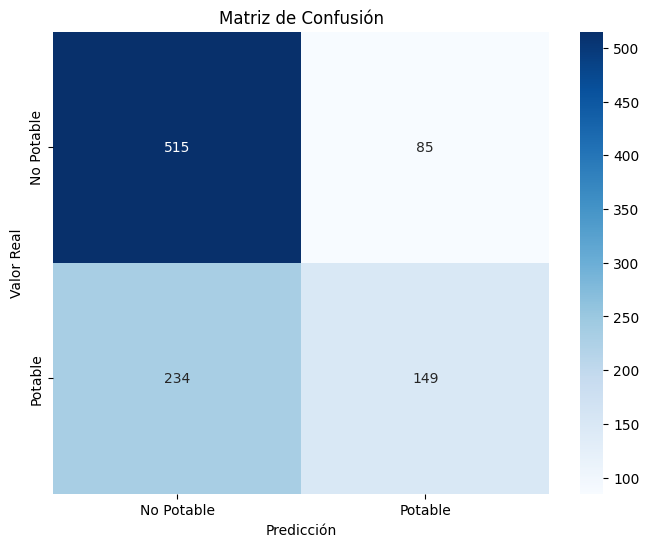

ANALISIS DE LA MATRIZ DE CONFUSIÓN
Verdaderos Negativos (TN): 515
Falsos Positivos (FP): 85
Falsos Negativos (FN): 234
Verdaderos Positivos (TP): 149
METRICAS DERIVADAS
Sensibilidad (Recall): 0.3890
Especificidad: 0.8583
Precisión: 0.6368
REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

  No Potable       0.69      0.86      0.76       600
     Potable       0.64      0.39      0.48       383

    accuracy                           0.68       983
   macro avg       0.66      0.62      0.62       983
weighted avg       0.67      0.68      0.65       983



In [23]:
# Matriz de confusion

# Generaremos la matrix de confusion de nuestro modelo
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['No Potable', 'Potable'],
            yticklabels=['No Potable', 'Potable'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calculamos las metricas especificas de la matriz y las mostramos para que sean mas facil de leer
TN,FP,FN,TP = cm.ravel()
print("ANALISIS DE LA MATRIZ DE CONFUSIÓN")
print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (TP): {TP}")

#Metricas derivadas

sensitivity = TP/(TP+FN) if (TP+FN)> 0 else 0
specificity = TN/(TN+FP) if (TN+FP)> 0 else 0
precision_manual = TP/(TP+FP) if (TP+FP)> 0 else 0

#Mostramos las metricas derivadas por consola
print("METRICAS DERIVADAS")
print(f"Sensibilidad (Recall): {sensitivity:.4f}")
print(f"Especificidad: {specificity:.4f}")
print(f"Precisión: {precision_manual:.4f}")

#Reporte de clasificacion completo
print("REPORTE DE CLASIFICACION")
print(classification_report(y_test,y_pred,target_names=['No Potable', 'Potable']))


In [24]:
# Analisis de predicciones 
resultados_df =pd.DataFrame({
    'Real':y_test,
    'Prediccion':y_pred,
    'Probabilidad_Potable':y_pred_proba.flatten()
})

#Caracteristicas originales del dataframe
resultados_df = pd.concat([resultados_df,pd.DataFrame(X_test,columns=X.columns)],axis=1)

# Analisis de predicciones correctas y predicciones incorrectas
predicciones_incorrectas = resultados_df[resultados_df['Real'] != resultados_df['Prediccion']]
predicciones_correctas = resultados_df[resultados_df['Real'] == resultados_df['Prediccion']]

#Imprimimos las predicciones para mostrarlas 
print("Predicciones")
print(f"Predicciones correctas: {len(predicciones_correctas)} ({len(predicciones_correctas)/len(resultados_df)*100:.2f}%)")

# Analisis de falsos positivos y falsos negativos
falsos_positivos = predicciones_incorrectas[predicciones_incorrectas['Prediccion']==1]
falsos_negativos = predicciones_incorrectas[predicciones_incorrectas['Prediccion']==0]

#Imprimimos los falsos positivos y negativos para mostrarlos 
print(f"ANALISIS DE ERRORES")
print(f"Falsos positivos (Agua no Potable clasificada como Potable): {len(falsos_positivos)}")
print(f"Falsos negativos (Agua Potable clasificada como No Potable): {len(falsos_negativos)}")


Predicciones
Predicciones correctas: 664 (67.55%)
ANALISIS DE ERRORES
Falsos positivos (Agua no Potable clasificada como Potable): 85
Falsos negativos (Agua Potable clasificada como No Potable): 234
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=60; total time=   0.9s
[CV] END ...................................n_estimators=110; total time=   1.6s
[CV] END ...................................n_estimators=160; total time=   2.5s
[CV] END ...................................n_estimators=210; total time=   2.9s
[CV] END ...................................n_estimators=210; total time=   2.7s
[CV] END ...................................n_estimators=260; total time=   3.8s
[CV] END ...................................n_estimators=310; total time=   3.8s
[CV] END ...................................n_estimators=360; total time=   5.1s
[CV] END ...................................n_estimators=410; total time